In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [9]:
df['cabin_null'].mean()

0.7710437710437711

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [15]:
df.groupby(['Survived'])['cabin_null'].mean()


Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [16]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [22]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [23]:
median = df.Age.median()
median

28.0

In [32]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,sujet,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [33]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

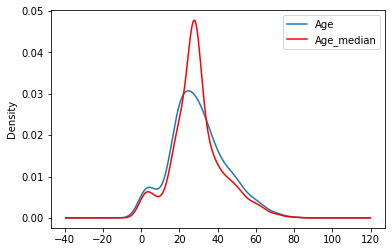

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [37]:
import pandas as pd
df = pd.read_csv('train.csv' , usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [64]:
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [63]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [65]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [39]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [40]:
df['Age'].isnull().sum()

177

In [53]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [55]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [56]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [66]:
 random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [67]:
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [94]:
random_sample.values
for i in random_sample.values:
    print(i)

28.0
50.0
0.92
36.0
26.0
36.0
31.0
65.0
65.0
47.0
22.0
26.0
4.0
39.0
21.0
55.0
33.0
0.75
24.0
39.0
20.0
40.0
14.0
29.0
30.0
0.75
36.0
21.0
27.0
40.0
32.0
2.0
20.0
52.0
35.0
42.0
38.0
36.0
20.0
15.0
22.0
21.0
42.0
21.0
28.0
5.0
3.0
24.0
35.0
28.0
38.0
24.0
25.0
32.0
57.0
25.0
13.0
25.0
62.0
42.0
38.0
51.0
26.0
20.0
16.0
29.0
40.0
35.0
2.0
23.0
22.0
36.0
18.0
39.0
58.0
27.0
18.0
19.0
29.0
23.0
0.42
49.0
45.0
33.0
58.0
24.0
34.0
39.0
31.0
57.0
22.0
23.5
23.0
8.0
62.0
4.0
33.0
18.0
26.0
32.0
24.0
28.0
45.0
36.0
19.0
29.0
24.0
50.0
43.0
16.0
21.0
27.0
4.0
36.0
64.0
32.0
34.0
41.0
34.0
17.0
19.0
28.0
26.0
28.0
52.0
36.0
4.0
48.0
43.0
36.0
60.0
45.0
27.0
35.0
27.0
21.0
31.0
5.0
30.0
19.0
32.5
38.0
24.0
36.0
25.0
35.0
45.5
31.0
30.0
22.0
22.0
27.0
43.0
20.0
18.0
22.0
11.0
29.0
24.5
17.0
20.0
56.0
21.0
2.0
30.0
19.0
49.0
36.0
8.0
80.0
50.0
18.0
22.0
25.0
15.0
34.0
15.0


In [98]:
import pandas as pd
for i in pd.Series(random_sample.values):
    if df.isnull()==True:
        df['random']=df['Age'].fillna(i)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [93]:
df["random"]=df['Age'].fillna(random_sample.values)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "ndarray"

In [90]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,random
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0
5,0,NaN,8.4583,28.0,NaN,NaN
6,0,54.0,51.8625,54.0,54.0,54.0
7,0,2.0,21.0750,2.0,2.0,2.0
8,1,27.0,11.1333,27.0,27.0,27.0
9,1,14.0,30.0708,14.0,14.0,14.0


In [84]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    df[variable+'_random']=df[variable].fillna(random_sample)
    
    

In [85]:
median=df.Age.median()

In [86]:
median

28.0

In [87]:
impute_nan(df,'Age',median)

In [88]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,NaN
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [99]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [100]:
import numpy as np
df['age_nan'] = np.where(df['Age'].isnull(),1,0)

In [102]:
df.head(10)

,Survived,Age,Fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [107]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
                                                        

In [108]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

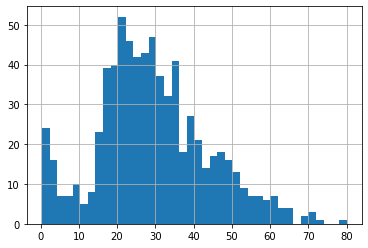

In [109]:
df.Age.hist(bins=40)

In [110]:
extreme = df.Age.mean() + 3*df.Age.std()

c:\users\sujeet\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

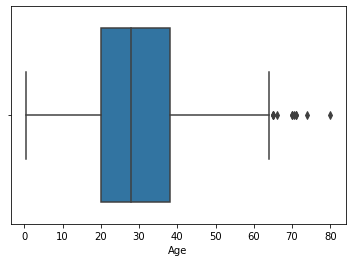

In [111]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [112]:
def impute_nan(df, variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [113]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [115]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

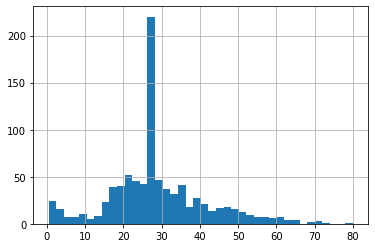

In [116]:
df.Age.hist(bins=40)

<AxesSubplot:>

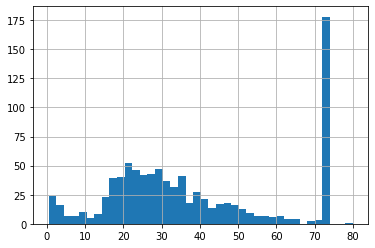

In [117]:
df.Age_end_distribution.hist(bins=40)

c:\users\sujeet\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

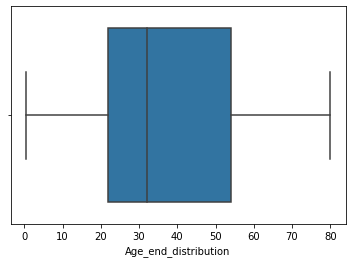

In [119]:
sns.boxplot('Age_end_distribution',data=df)